In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from env import host, username, password
import prepare
import wrangle
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import explore
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
df = pd.read_csv('zillow_data.csv')

In [2]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
top_10 = df.nlargest(10, 'taxvaluedollarcnt')

In [4]:
top_10

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2117727,0.0,0.0,NaN,98428909.0,NaN,1032955.60,6059.0
530834,11.0,16.0,52503.0,90188462.0,1990.0,1078101.87,6037.0
950854,12.0,15.0,35046.0,88020448.0,2002.0,1052070.50,6037.0
1618393,7.0,20.0,28725.0,83196095.0,1938.0,994030.96,6037.0
2134692,5.0,8.0,22300.0,71067500.0,2014.0,824166.91,6037.0
430030,7.0,14.0,22396.0,70416358.0,2001.0,841059.04,6037.0
10560,0.0,0.0,NaN,67506489.0,NaN,1195295.62,6059.0
516892,0.0,0.0,NaN,64832974.0,NaN,675626.62,6059.0
1625501,0.0,0.0,NaN,61614314.0,NaN,618631.12,6059.0
2152526,0.0,0.0,NaN,60630272.0,NaN,1337755.86,6059.0


In [5]:
prep_zillow = wrangle.prep_zillow(df)

In [6]:
prep_zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [7]:
top_10 = prep_zillow.nlargest(10, 'taxvaluedollarcnt')

In [8]:
top_10

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
538128,5.0,4.0,6595.0,2999902.0,1925.0,37057.78,6037.0
1495387,1.0,1.5,1867.0,2999881.0,2012.0,31759.32,6059.0
397394,3.0,4.5,6536.0,2999859.0,1998.0,31384.74,6059.0
810861,4.0,4.0,2733.0,2999267.0,1958.0,36039.32,6037.0
616927,4.0,2.0,2331.0,2999216.0,1920.0,34765.77,6037.0
633991,5.0,5.5,4510.0,2999199.0,2000.0,34425.02,6059.0
2085652,5.0,5.5,4454.0,2999198.0,1999.0,32905.92,6059.0
899927,4.0,5.0,4181.0,2999196.0,1978.0,33773.18,6037.0
1101625,2.0,4.0,3289.0,2999196.0,1996.0,34874.36,6037.0
2134735,4.0,6.0,3797.0,2999195.0,1963.0,36175.90,6037.0


In [9]:
df = pd.get_dummies(prep_zillow, columns=['fips'], drop_first=True)

In [10]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_data(df, 'taxvaluedollarcnt')

In [11]:
X_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips_6059.0,fips_6111.0
1328859,2.0,2.0,2115.0,1959.0,19481.02,0,0
1513490,2.0,1.0,1052.0,1924.0,3414.79,0,0
1548397,3.0,2.0,1176.0,1963.0,5170.90,1,0
98554,2.0,1.0,1104.0,1949.0,1846.84,0,0
1456589,3.0,2.0,1612.0,1918.0,1075.11,0,0


In [12]:
y_train.head()

1328859    1699900.0
1513490     271951.0
1548397     448818.0
98554       129067.0
1456589      77205.0
Name: taxvaluedollarcnt, dtype: float64

In [13]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1061628 entries, 1328859 to 1952278
Series name: taxvaluedollarcnt
Non-Null Count    Dtype  
--------------    -----  
1061628 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB


In [14]:
X_train_s = wrangle.robust_scaler(X_train)

In [15]:
X_validate_s = wrangle.robust_scaler(X_validate)

In [16]:
X_test_s = wrangle.robust_scaler(X_test)

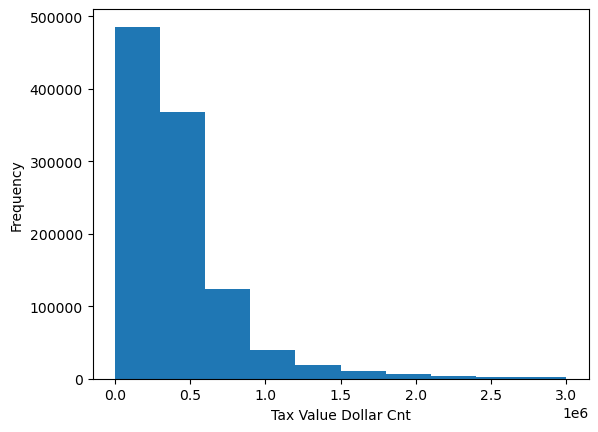

In [17]:
plt.hist(y_train)
plt.xlabel('Tax Value Dollar Cnt')
plt.ylabel('Frequency')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [19]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict taxvaluedollarcnt_pred_mean
taxvaluedollarcnt_pred_mean = y_train['taxvaluedollarcnt'].mean()
y_train['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean
y_validate['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean

# 2. compute taxvaluedollarcnt_pred_median
taxvaluedollarcnt_pred_median = y_train['taxvaluedollarcnt'].median()
y_train['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median
y_validate['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median

# 3. RMSE of taxvaluedollarcnt_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of taxvaluedollarcnt_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


RMSE using Mean
Train/In-Sample:  375335.46 
Validate/Out-of-Sample:  375805.74
RMSE using Median
Train/In-Sample:  387215.31 
Validate/Out-of-Sample:  387749.37


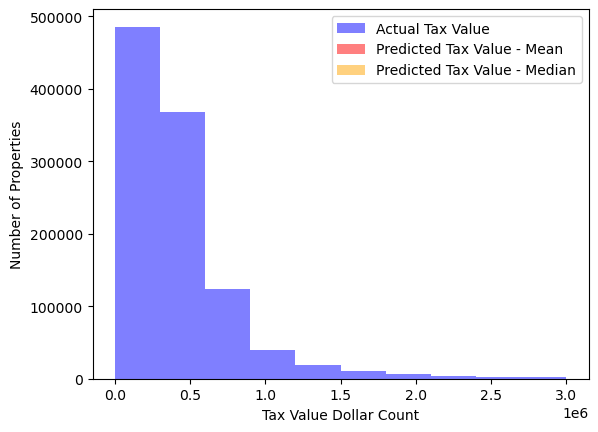

In [20]:

plt.hist(y_train.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Tax Value")
plt.hist(taxvaluedollarcnt_pred_mean, bins=50, color='red', alpha=.5, rwidth=100, label="Predicted Tax Value - Mean")
plt.hist(taxvaluedollarcnt_pred_median, bins=50, color='orange', alpha=.5, rwidth=100, label="Predicted Tax Value - Median")
plt.xlabel("Tax Value Dollar Count")
plt.ylabel("Number of Properties")
plt.legend()
plt.show()

In [21]:

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_s, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train_s)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate_s)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  71680.74162617823 
Validation/Out-of-Sample:  69713.94929889274


In [22]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data
lars.fit(X_train_s, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train_s)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate_s)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  71786.30380873819 
Validation/Out-of-Sample:  69817.23403026137


In [23]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data
glm.fit(X_train_s, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train_s)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate_s)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=0 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=0 & alpha=0
Training/In-Sample:  71680.74162618062 
Validation/Out-of-Sample:  69713.94927897994


In [24]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_s
X_train_s_degree2 = pf.fit_transform(X_train_s)

# transform X_validate_s & X_test_s
X_validate_s_degree2 = pf.transform(X_validate_s)
X_test_s_degree2 = pf.transform(X_test_s)

In [25]:

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_s_degree2, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train_s_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate_s_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  66313.63063086326 
Validation/Out-of-Sample:  66660.98507426183


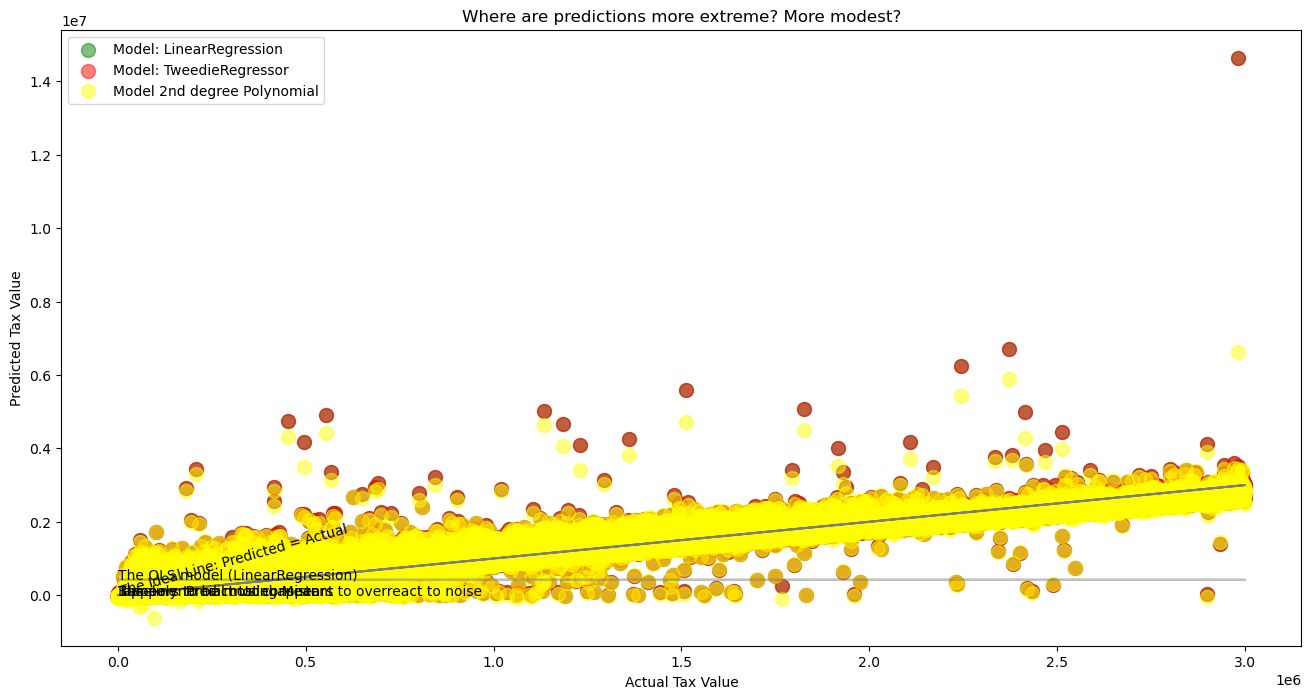

In [26]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm, 
            alpha=.5, color="green", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm, 
            alpha=.5, color="red", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2, 
            alpha=.5, color="yellow", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

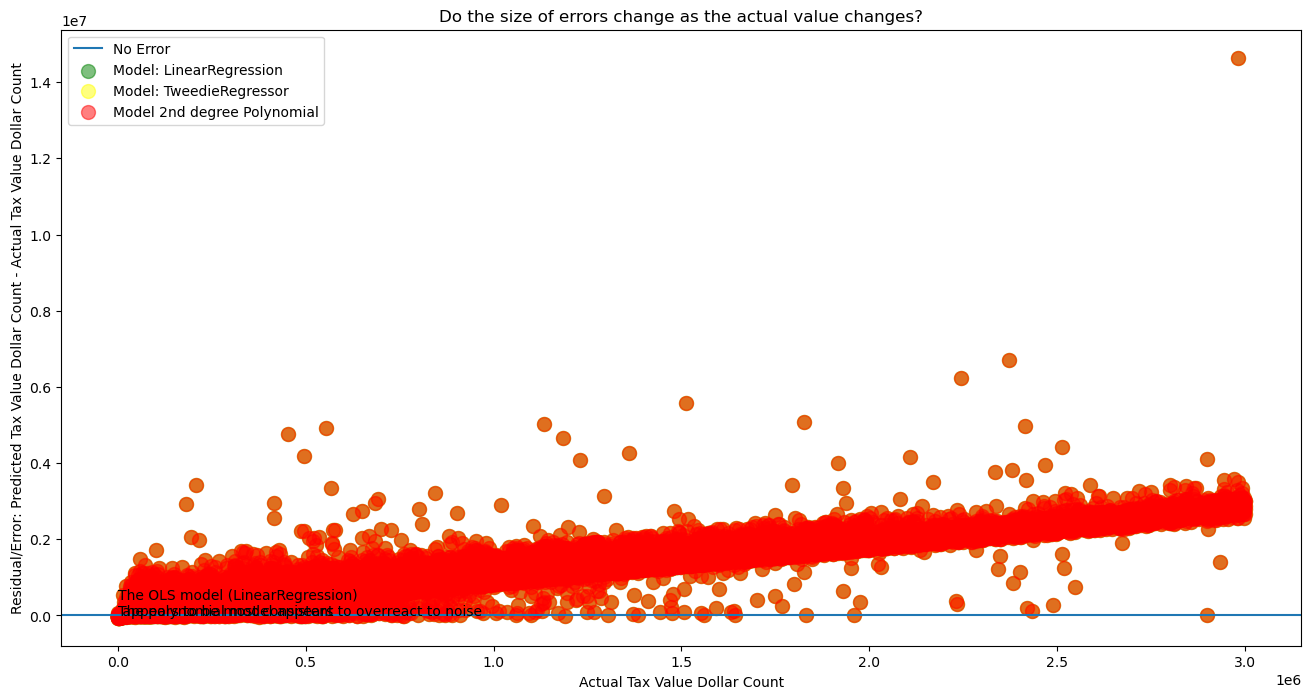

In [27]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm, 
            alpha=.5, color="green", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm, 
            alpha=.5, color="red", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value Dollar Count")
plt.ylabel("Residual/Error: Predicted Tax Value Dollar Count - Actual Tax Value Dollar Count")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

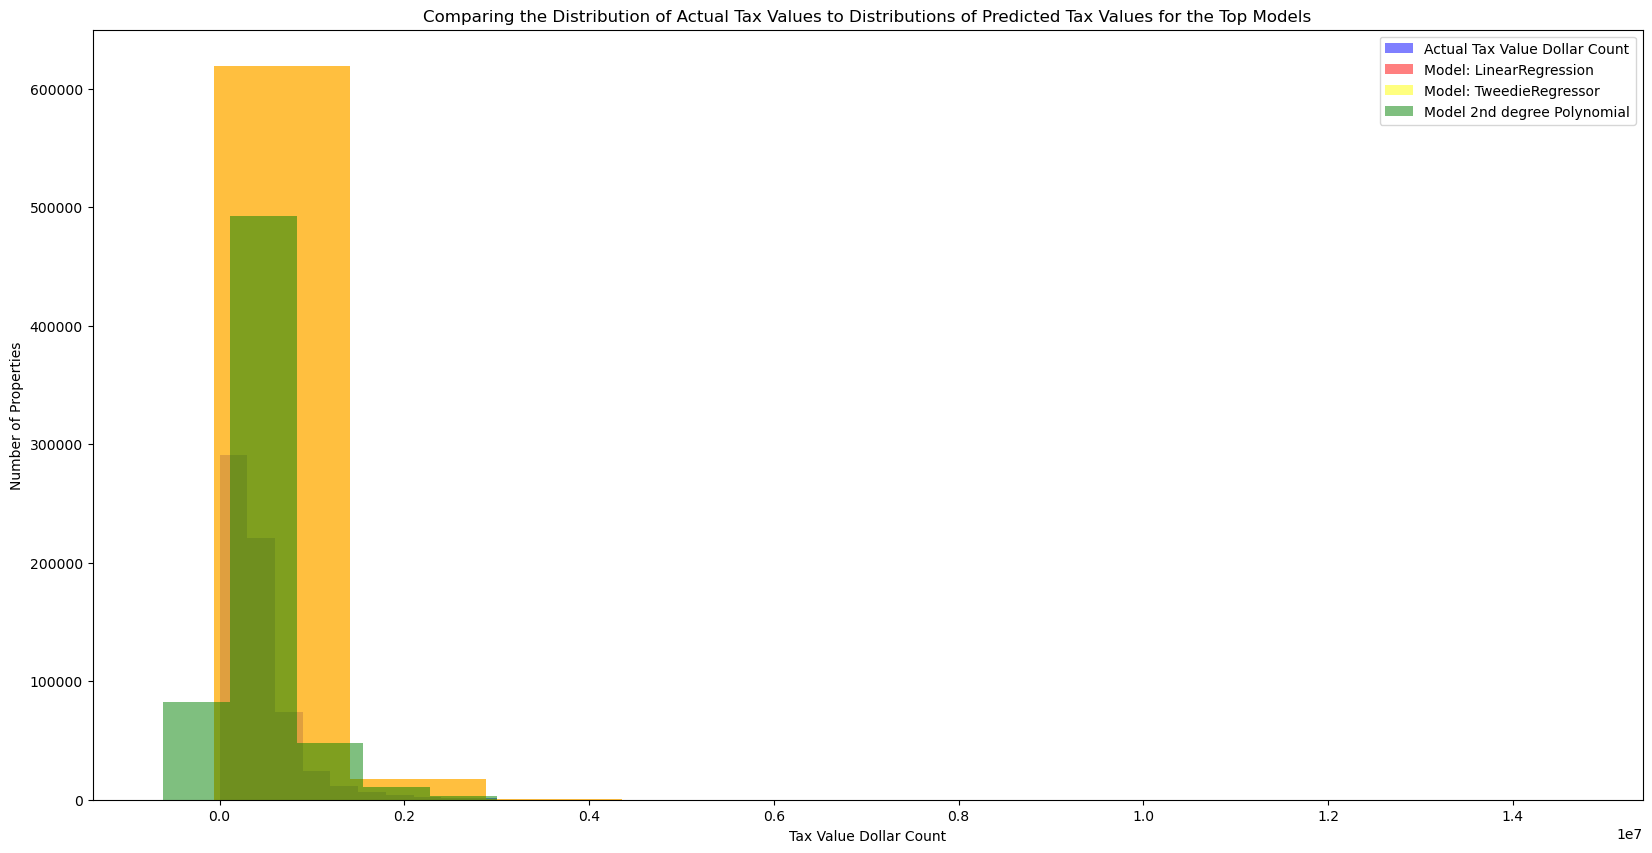

In [28]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(20,10))
plt.hist(y_validate.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Tax Value Dollar Count")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tax Value Dollar Count")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Tax Values to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()

In [37]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data
glm.fit(X_train_s, y_train.taxvaluedollarcnt)

# predict on train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train_s)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm)**(1/2)

# predict on test
y_test['taxvaluedollarcnt_pred_glm'] = glm.predict(X_test_s)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, y_test.taxvaluedollarcnt_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=0 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nTest/Out-of-Sample: ", rmse_test)

RMSE for GLM using Tweedie, power=0 & alpha=0
Training/In-Sample:  71680.74162618062 
Test/Out-of-Sample:  71864.34090452033
